## Table of Content  
1. [Data Cleaning](#1-Data-Cleaning)  
   1.1 [Import Dependencies](#1.1-Import-Dependencies)  
   1.2 [Dataset Attributes](#1.2-Dataset-Attributes)  
   1.3 [Standardize Categorical Values](#1.3-Standardize-Categorical-Values)  
   1.4 [Inspecting Missing Values](#1.4-Inspecting-Missing-Values)  
   1.5 [Replacing the Missing Values](#1.5-Replacing-the-Missing-Values)  
   1.6 [Categorizing the data in different types](#1.6-Categories)  
   1.7 [Duplicate Check in Dataset](#1.7-Duplicate-check)  
   1.8 [Outlier Detection](#1.8-Outlier-Detection)  
   1.9 [Treatment of Outliers](#1.9-Treatment-of-Outliers)  
   

#### 1. Data Cleaning  
##### 1.1 Import Dependencies and Loading Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec
import math
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.utils import resample # For bootstrapping


df = pd.read_csv("healthcare-dataset-stroke-data.csv", sep=r",")

df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [2]:
#df.describe()

In [3]:
# id column is removed as its unique and it won't matter for the output
df.drop(columns = ['id'],inplace = True)

#### 1.2 Dataset Attributes

In [4]:
df.shape

(5110, 11)

There are 5110 rows and 12 columns

In [5]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [6]:
df.dtypes
print(df['gender'].unique())
print(df['ever_married'].unique())
print(df['work_type'].unique())
print(df['Residence_type'].unique())
print(df['smoking_status'].unique())
print(df['bmi'].unique())

['Male' 'Female' 'Other']
['Yes' 'No']
['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
['Urban' 'Rural']
['formerly smoked' 'never smoked' 'smokes' 'Unknown']
[36.6  nan 32.5 34.4 24.  29.  27.4 22.8 24.2 29.7 36.8 27.3 28.2 30.9
 37.5 25.8 37.8 22.4 48.9 26.6 27.2 23.5 28.3 44.2 25.4 22.2 30.5 26.5
 33.7 23.1 32.  29.9 23.9 28.5 26.4 20.2 33.6 38.6 39.2 27.7 31.4 36.5
 33.2 32.8 40.4 25.3 30.2 47.5 20.3 30.  28.9 28.1 31.1 21.7 27.  24.1
 45.9 44.1 22.9 29.1 32.3 41.1 25.6 29.8 26.3 26.2 29.4 24.4 28.  28.8
 34.6 19.4 30.3 41.5 22.6 56.6 27.1 31.3 31.  31.7 35.8 28.4 20.1 26.7
 38.7 34.9 25.  23.8 21.8 27.5 24.6 32.9 26.1 31.9 34.1 36.9 37.3 45.7
 34.2 23.6 22.3 37.1 45.  25.5 30.8 37.4 34.5 27.9 29.5 46.  42.5 35.5
 26.9 45.5 31.5 33.  23.4 30.7 20.5 21.5 40.  28.6 42.2 29.6 35.4 16.9
 26.8 39.3 32.6 35.9 21.2 42.4 40.5 36.7 29.3 19.6 18.  17.6 19.1 50.1
 17.7 54.6 35.  22.  39.4 19.7 22.5 25.2 41.8 60.9 23.7 24.5 31.2 16.
 31.6 25.1 24.8 18.3 20.  19.5 36.  35.3 40.

There are different types of data types in the dataset and some are **Binary**, **Categorical**, **Continues**

#### 1.3 Standardize Categorical Values  

Converting categorical values into continuous values by assigning them values from 1 to 5 

In [7]:
pd.set_option('future.no_silent_downcasting', True)
df['gender'] = df['gender'].replace({'Female':0, 'Male':1, 'Other': 0}).astype('int64')
df['ever_married'] = df['ever_married'].replace({'Yes':1, 'No':0}).astype('int64')
df['work_type'] = df['work_type'].replace({'Private':1, 'Self-employed':2, 'Govt_job':3, 'children':4, 'Never_worked':5}).astype('int64')
df['Residence_type'] = df['Residence_type'].replace({'Urban':0, 'Rural':1}).astype('int64')
df['smoking_status'] = df['smoking_status'].replace({'formerly smoked':1, 'never smoked':2, 'smokes':3, 'Unknown':4}).astype('int64')
#df['bmi'] = df['bmi'].fillna(0)
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,1,0,228.69,36.6,1,1
1,0,61.0,0,0,1,2,1,202.21,NaN,2,1
2,1,80.0,0,1,1,1,1,105.92,32.5,2,1
3,0,49.0,0,0,1,1,0,171.23,34.4,3,1
4,0,79.0,1,0,1,2,1,174.12,24.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,0,80.0,1,0,1,1,0,83.75,NaN,2,0
5106,0,81.0,0,0,1,2,0,125.20,40.0,2,0
5107,0,35.0,0,0,1,2,1,82.99,30.6,2,0
5108,1,51.0,0,0,1,1,1,166.29,25.6,1,0


#### 1.4 Inspecting Missing Values  
As we can see there are multiple missing values in the bmi section as seen above

In [8]:
print(np.any(np.isnan(df)))
print(np.all(np.isfinite(df)))

True
False


In [9]:
l1 = [i for i in range(len(df.isnull()['bmi'])) if df.isnull().loc[i, 'bmi'] == True]
print('Total Number of Missing Values in bmi feature :', len(l1))

Total Number of Missing Values in bmi feature : 201


#### 1.5 Replacing the Missing Values  
*As seen in the describe table, the mean and median of bmi are very close to each other*  
*So replacing the missing values with mean values*

In [10]:
df['bmi'] = df['bmi'].fillna(df['bmi'].mean())

In [11]:
df.describe()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,0.413894,43.226614,0.097456,0.054012,0.656164,1.837965,0.491977,106.147677,28.893237,2.585519,0.048728
std,0.492578,22.612647,0.296607,0.226063,0.475034,1.118698,0.499985,45.283560,7.698018,1.092522,0.215320
min,0.000000,0.080000,0.000000,0.000000,0.000000,1.000000,0.000000,55.120000,10.300000,1.000000,0.000000
25%,0.000000,25.000000,0.000000,0.000000,0.000000,1.000000,0.000000,77.245000,23.800000,2.000000,0.000000
50%,0.000000,45.000000,0.000000,0.000000,1.000000,1.000000,0.000000,91.885000,28.400000,2.000000,0.000000
75%,1.000000,61.000000,0.000000,0.000000,1.000000,3.000000,1.000000,114.090000,32.800000,4.000000,0.000000
max,1.000000,82.000000,1.000000,1.000000,1.000000,5.000000,1.000000,271.740000,97.600000,4.000000,1.000000


#### 1.6 Categorizing the data in different types
- **Categorical Features:** gender, ever_married, work_type, Residence_type, smoking_status
- **Binary Numerical Features:** hypertension,heart_disease, stroke
- **Continous Numerical Features:** age, avg_glucose_level, bmi

We can move gender, ever_married and Residence_type to Binary Numerical like this  
- **Categorical Features:** work_type, smoking_status  
- **Binary Numerical Features:** hypertension,heart_disease, stroke, gender, ever_married, Residence_type
- **Continous Numerical Features:** age, avg_glucose_level, bmi

#### 1.7 Duplicate Check in Dataset  

In [12]:
duplicates = df.duplicated()
print("Number of duplicate rows:", duplicates.sum())

Number of duplicate rows: 0


There are no duplicates rows in the dataset 

#### 1.8 Outlier Detection

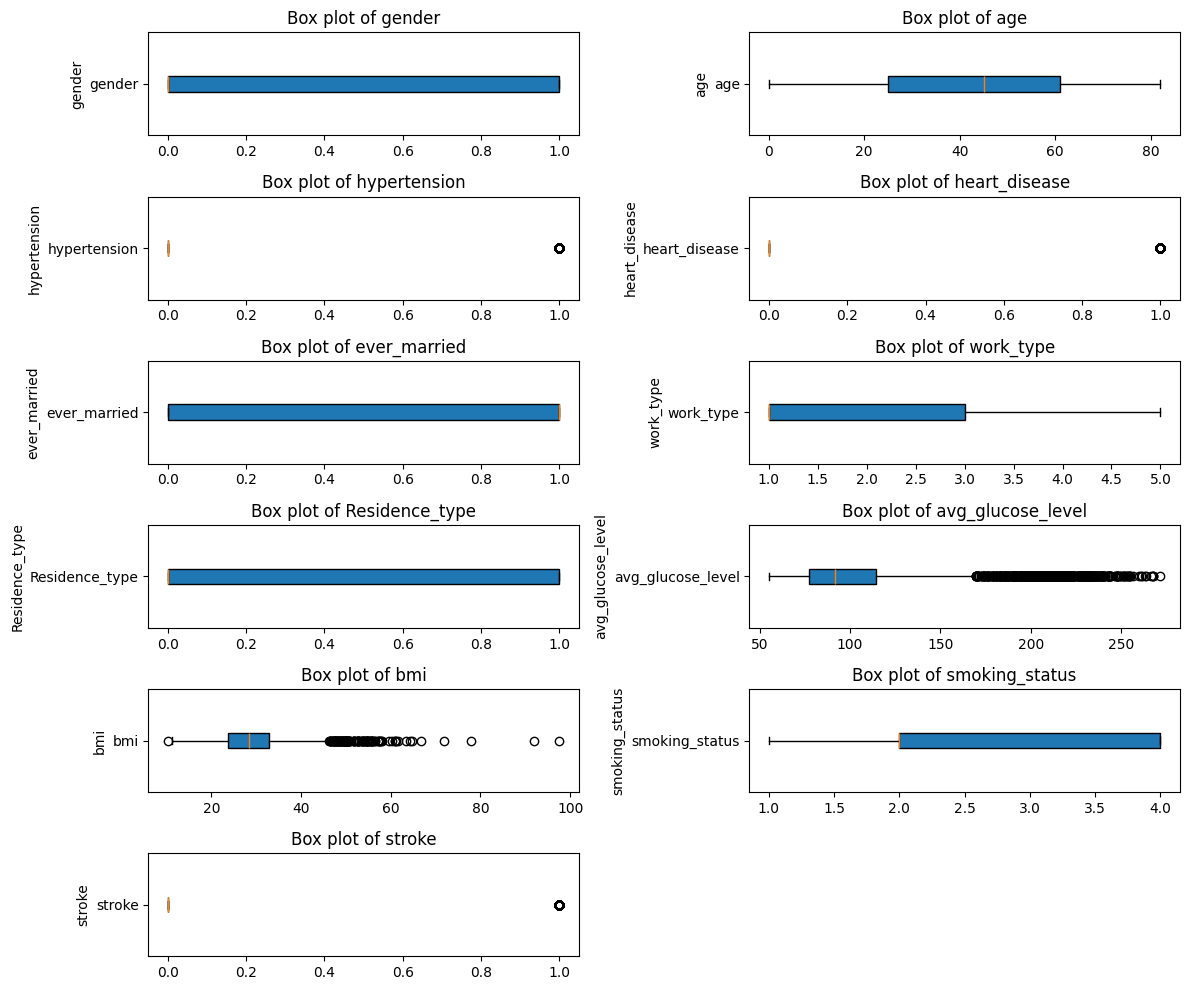

In [13]:
import math
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

n_o_plots = len(df.columns)
n_o_cols = 2
n_o_rows = int(math.ceil(n_o_plots / n_o_cols))
gs = gridspec.GridSpec(n_o_rows, n_o_cols)
fig = plt.figure(figsize=(12, 10))

for i in range(n_o_plots):
    ax = fig.add_subplot(gs[i])
    column = df.columns[i]
    data = pd.to_numeric(df[column], errors='coerce').dropna()
    ax.boxplot(data, patch_artist=True, tick_labels=[column], vert=False)
    ax.set_title(f"Box plot of {column}")
    ax.set_ylabel(column)

plt.tight_layout()
plt.show()



**Key Observations**  
- Highly Correlated Pairs
  - age and ever_married 0.679: Older individuals are more likely to be married
  - work_type and ever_married 0.578: Possibly due to age/work role influencing marital status
- Low to Moderate Correlation
  - age 0.245: moderate positive correlation, as age increases stroke likelihood slightly increases
  - hypertension 0.131
  - heart_disease 0.134
  - avg_glucose_level 0.131: slight correlation, hinting at diabetes being a risk factor    
- Others are very weak to find correlations  
  - Either they don't impact the stroke strongly or need more information to find correlation  

In [29]:
# = df.groupby(['stroke'])['stroke'].count()
stroke_counts = df['stroke'].value_counts()

**The count of patients that have stroke to patients that don't have a stroke is very high, one can say they are highly unbalanced**

In [17]:
df[['age', 'avg_glucose_level', 'bmi']].describe()

,age,avg_glucose_level,bmi
count,5110.000000,5110.000000,5110.000000
mean,43.226614,106.147677,28.893237
std,22.612647,45.283560,7.698018
min,0.080000,55.120000,10.300000
25%,25.000000,77.245000,23.800000
50%,45.000000,91.885000,28.400000
75%,61.000000,114.090000,32.800000
max,82.000000,271.740000,97.600000


#### 1.9 Treatment of Outliers  
Using binning on bmi, avg_glucose_level and age  
- Why?
  - Easier to understand categories "young" and "old" than to just look a range of numbers
  - Reduces impact on outliers. Exterme values in bmi or glucose can skew model learning
  - Can help in neutralizing outliers influence by grouping values into broader buckets

In [ ]:
df['bmi_cat'] = pd.cut(df['bmi'], bins = [0, 19, 25,30,10000], labels = ['Underweight', 'Ideal', 'Overweight', 'Obesity'])
df['age_cat'] = pd.cut(df['age'], bins = [0,13,18, 45,60,200], labels = ['Children', 'Teens', 'Adults','Mid Adults','Elderly'])
df['glucose_cat'] = pd.cut(df['avg_glucose_level'], bins = [0,90,160,230,500], labels = ['Low', 'Normal', 'High', 'Very High'])
df.head(10)


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,bmi_cat,age_cat,glucose_cat
0,1,67.0,0,1,1,1,0,228.69,36.600000,1,1,Obesity,Elderly,High
1,0,61.0,0,0,1,2,1,202.21,28.893237,2,1,Overweight,Elderly,High
2,1,80.0,0,1,1,1,1,105.92,32.500000,2,1,Obesity,Elderly,Normal
3,0,49.0,0,0,1,1,0,171.23,34.400000,3,1,Obesity,Mid Adults,High
4,0,79.0,1,0,1,2,1,174.12,24.000000,2,1,Ideal,Elderly,High
5,1,81.0,0,0,1,1,0,186.21,29.000000,1,1,Overweight,Elderly,High
6,1,74.0,1,1,1,1,1,70.09,27.400000,2,1,Overweight,Elderly,Low
7,0,69.0,0,0,0,1,0,94.39,22.800000,2,1,Ideal,Elderly,Normal
8,0,59.0,0,0,1,1,1,76.15,28.893237,4,1,Overweight,Mid Adults,Low
9,0,78.0,0,0,1,1,0,58.57,24.200000,4,1,Ideal,Elderly,Low


## Exploratory Data Analysis (EDA)

In [48]:
    FILEPATH = 'healthcare-dataset-stroke-data.csv'
    NUMERICAL_FEATURES = ['age', 'avg_glucose_level', 'bmi']
    CATEGORICAL_FEATURES = ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
    REGRESSION_Y_VARS = ['avg_glucose_level', 'bmi']
    DIST_PALETTE = ['#9bb7d4', '#0f4c81']
    REG_PALETTE = {0: 'lightgray', 1: '#0f4c81'}

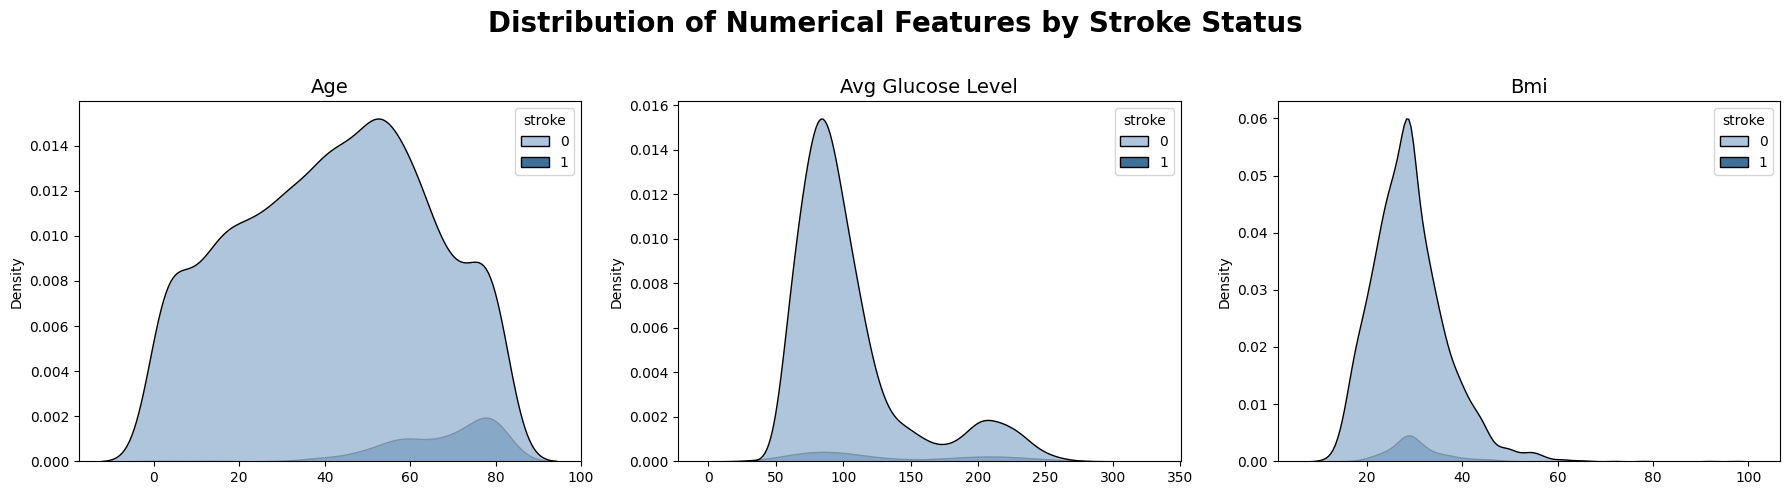

In [50]:
def plot_numerical_distributions(df, features, palette):
    """Plots KDE for numerical features, comparing stroke vs. no-stroke."""
    fig, axes = plt.subplots(1, len(features), figsize=(18, 5))
    fig.suptitle('Distribution of Numerical Features by Stroke Status', fontsize=20, fontweight='bold')
    for ax, feature in zip(axes, features):
        sns.kdeplot(data=df, x=feature, hue='stroke', ax=ax, palette=palette, fill=True, ec='black', alpha=0.8)
        ax.set_title(feature.replace('_', ' ').title(), fontsize=14)
        ax.set_xlabel('')
        ax.set_ylabel('Density')
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.savefig('numerical_distributions.png')
    plt.show()

plot_numerical_distributions(df, NUMERICAL_FEATURES, DIST_PALETTE)

Goal:

This function generates Kernel Density Estimate (KDE) plots for the numerical columns (age, avg_glucose_level, bmi). It overlays the distributions for patients who had a stroke versus those who did not.

Output:

The visualization clearly shows that the age distribution for stroke patients is shifted significantly towards older ages compared to non-stroke patients.

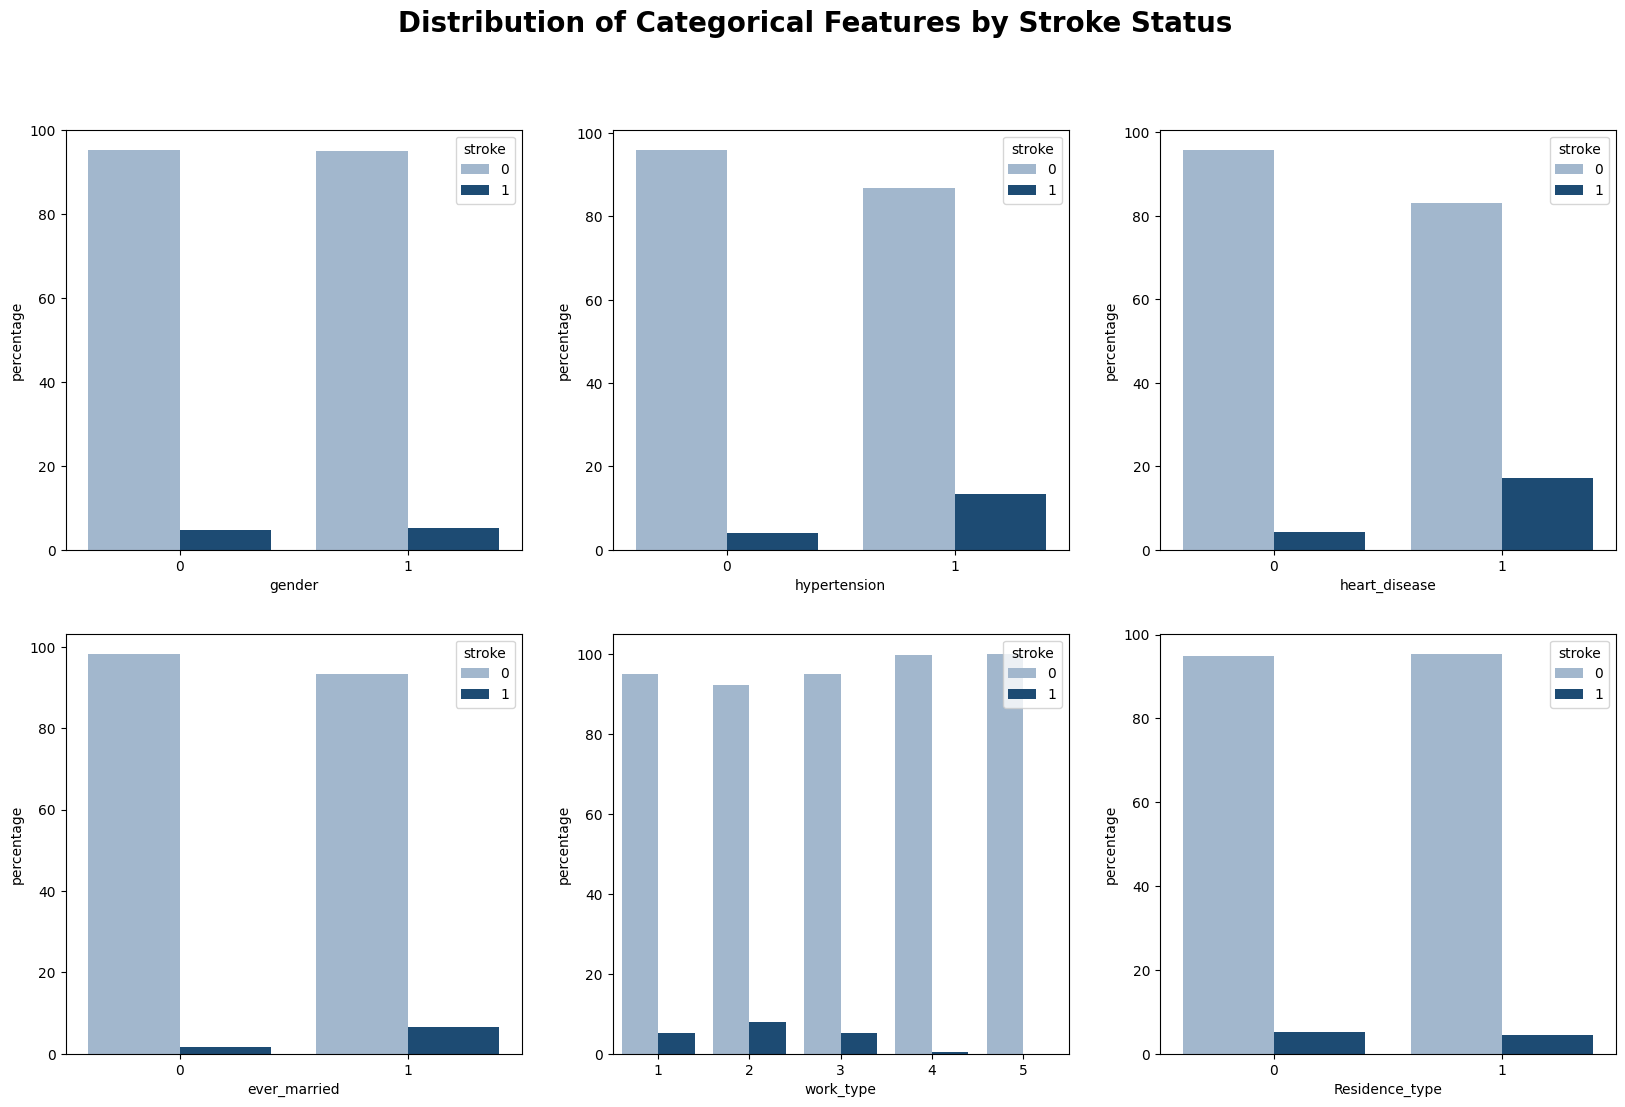

In [52]:
def plot_categorical_distributions(df, features, palette):
    """Plots bar charts for categorical features, showing percentage by stroke status."""
    fig, axes = plt.subplots(2, 3, figsize=(20, 12))
    fig.suptitle('Distribution of Categorical Features by Stroke Status', fontsize=20, fontweight='bold')
    axes = axes.flatten()
    for i, feature in enumerate(features[:6]):
        x = df.groupby(feature)['stroke'].value_counts(normalize=True).mul(100).rename('percentage').reset_index()
        sns.barplot(data=x, x=feature, y='percentage', hue='stroke', ax=axes[i], palette=palette)
        # ... (styling code)
    plt.savefig('categorical_distributions.png')
    plt.show()


plot_categorical_distributions(df, CATEGORICAL_FEATURES, DIST_PALETTE)

Goal:

This function creates bar charts for categorical features like hypertension and heart_disease. It calculates the percentage of stroke vs. no-stroke outcomes within each category.

Interpretation:

This plot effectively highlights that pre-existing conditions are major risk factors; for instance, the bar for patients with hypertension shows a much higher percentage of strokes.

In [22]:
# --- 1. Sampling Distributions ---
print("--- 1. Sampling Distributions ---")
# We'll explore the sampling distribution of the mean for the 'age' column.

# Population (our dataset's 'age' column)
population_ages = df['age'].dropna() # Ensure no NaNs if any remained
population_mean_age = population_ages.mean()
population_std_age = population_ages.std()

print(f"Population (dataset 'age') mean: {population_mean_age:.2f}")
print(f"Population (dataset 'age') std dev: {population_std_age:.2f}")



--- 1. Sampling Distributions ---
Population (dataset 'age') mean: 43.23
Population (dataset 'age') std dev: 22.61


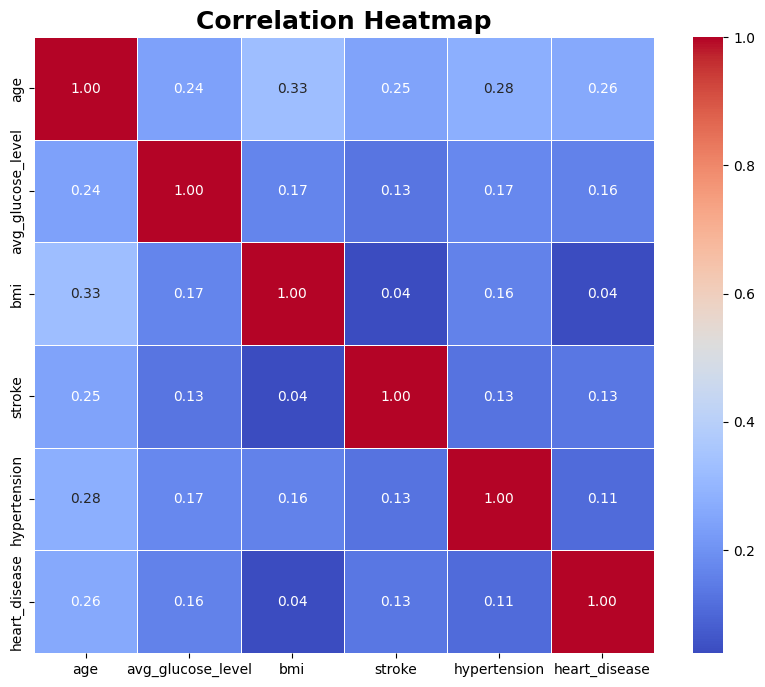

In [56]:
def plot_correlation_heatmap(df, num_features):
    """Plots a correlation heatmap."""
    plt.figure(figsize=(10, 8))
    corr_df = df[num_features + ['stroke', 'hypertension', 'heart_disease']]
    correlation_matrix = corr_df.corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
    plt.title('Correlation Heatmap', fontsize=18, fontweight='bold')
    plt.savefig('correlation_heatmap.png')
    plt.show()

plot_correlation_heatmap(df, NUMERICAL_FEATURES)

Goal:

This function calculates the linear correlation between the key numerical and binary features. It then visualizes this correlation matrix as a color-coded heatmap.

Interpretation:

It generates a visual matrix where colors indicate the strength of relationships. This confirms that age has the strongest positive correlation with stroke among the numerical features.

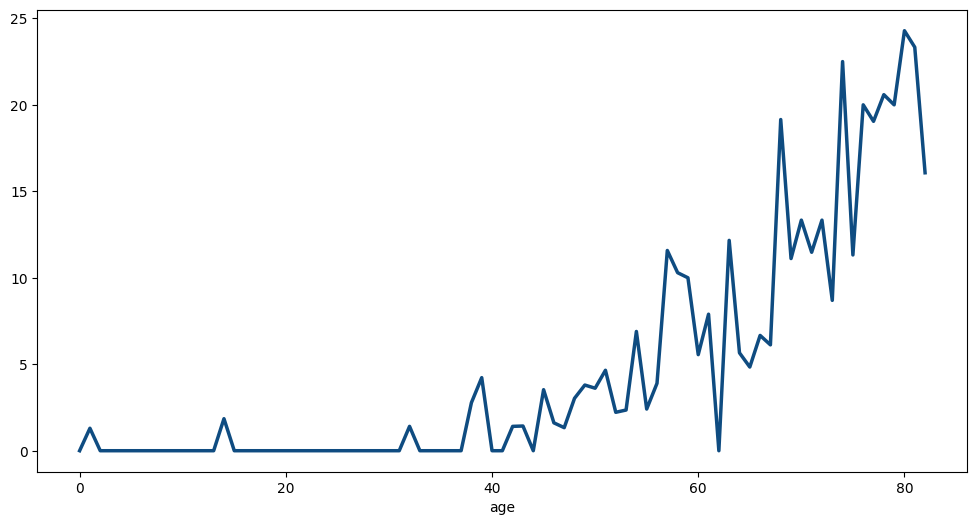

In [57]:
def plot_age_stroke_risk(df):
    """Plots a line chart showing stroke risk increase with age."""
    plt.figure(figsize=(12, 6))
    age_stroke_rate = df.groupby(df['age'].astype(int))['stroke'].mean() * 100
    sns.lineplot(x=age_stroke_rate.index, y=age_stroke_rate.values, color='#0f4c81', linewidth=2.5)
    # ... (styling code)
    plt.savefig('age_vs_stroke_risk.png')
    plt.show()

plot_age_stroke_risk(df)

Goal:

This function specifically visualizes the relationship between age and stroke risk. It groups the data by age and calculates the average stroke rate for each age.

Interpretation:

It produces age_vs_stroke_risk.png, a line chart that powerfully illustrates the core finding of the dataset. The line shows a clear and steep upward trend, indicating that the risk of stroke consistently and significantly increases with age.

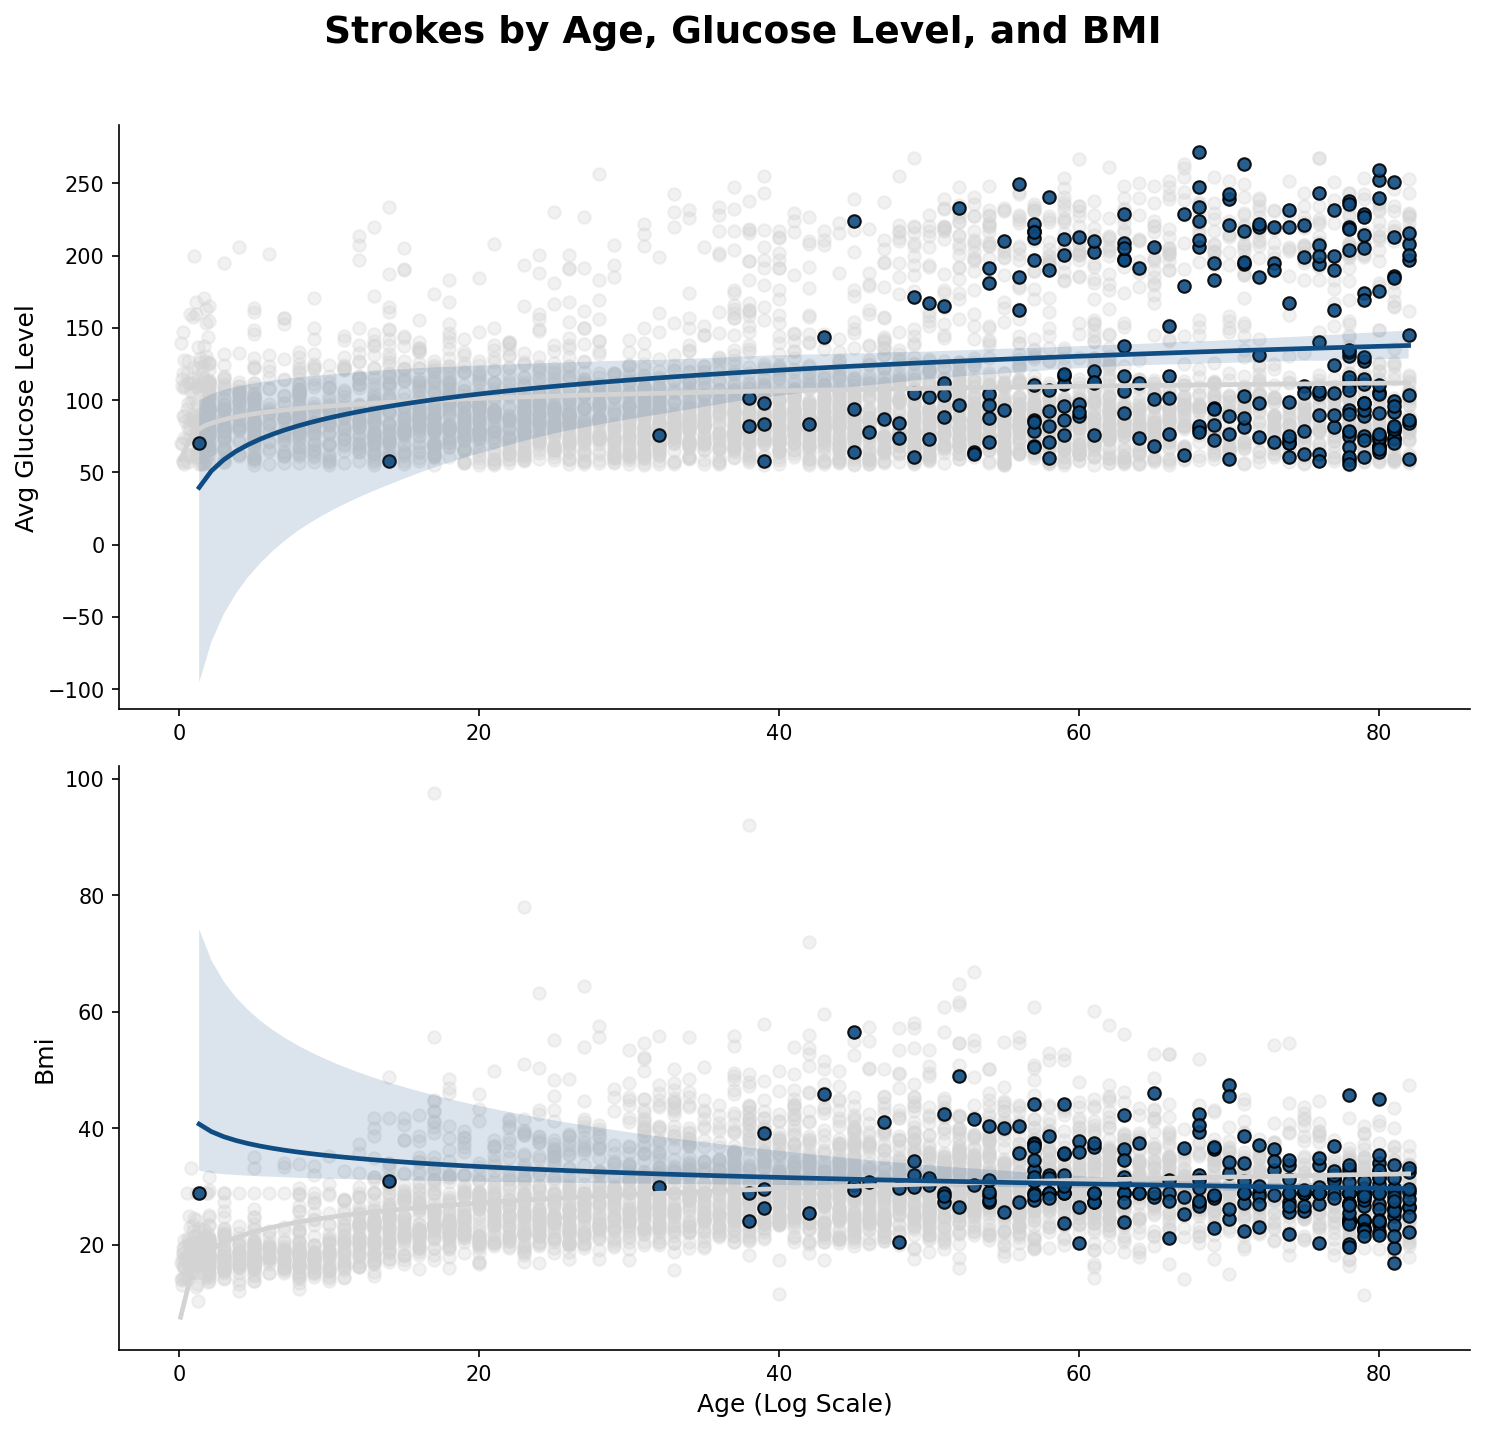

In [59]:
def plot_age_regression(df, y_vars, palette):
    """Creates stacked regression plots of Age vs. other numerical variables."""
    fig, axes = plt.subplots(len(y_vars), 1, figsize=(10, 5 * len(y_vars)), dpi=150)
    fig.suptitle('Strokes by Age, Glucose Level, and BMI', fontsize=18, fontweight='bold', y=0.95)

    # Separate the data for clarity
    stroke_df = df[df['stroke'] == 1]
    no_stroke_df = df[df['stroke'] == 0]

    for i, y_var in enumerate(y_vars):
        ax = axes[i]
        
        # Plot for non-stroke patients (without the '...' placeholder)
        sns.regplot(data=no_stroke_df, x='age', y=y_var, ax=ax,
                    color=palette[0], logx=True, 
                    scatter_kws={'alpha': 0.3})
        
        # Plot for stroke patients (without the '...' placeholder)
        sns.regplot(data=stroke_df, x='age', y=y_var, ax=ax,
                    color=palette[1], logx=True,
                    scatter_kws={'edgecolor': 'black', 'linewidths': 1, 'alpha': 0.9})
        
        # Styling
        ax.set_ylabel(y_var.replace('_', ' ').title(), fontsize=12)
        ax.set_xlabel('Age (Log Scale)' if i == len(y_vars) - 1 else '', fontsize=12)
        for spine in ['top', 'right']:
            ax.spines[spine].set_visible(False)
            
    plt.tight_layout(rect=[0, 0, 1, 0.93])
    plt.savefig('age_regression_plots.png')
    plt.show()


plot_age_regression(df, REGRESSION_Y_VARS, REG_PALETTE)

#### Clustering Models
1. **K-Means Clustering**


Mean of Original Numerical Features by Cluster:
                     age  avg_glucose_level        bmi
cluster_label                                         
0              14.750367          93.514765  22.371442
1              51.981254          90.102049  30.872322
2              61.113150         208.366636  33.112498

Categorical Feature Counts by Cluster (unstacked):

--- gender ---
gender            0     1
cluster_label            
0               750   612
1              1903  1191
2               342   312

--- hypertension ---
hypertension      0    1
cluster_label           
0              1360    2
1              2771  323
2               481  173

--- heart_disease ---
heart_disease     0    1
cluster_label           
0              1360    2
1              2925  169
2               549  105

--- ever_married ---
ever_married      0     1
cluster_label            
0              1305    57
1               388  2706
2                64   590

--- work_type ---
work_type   

<Figure size 1200x1000 with 0 Axes>

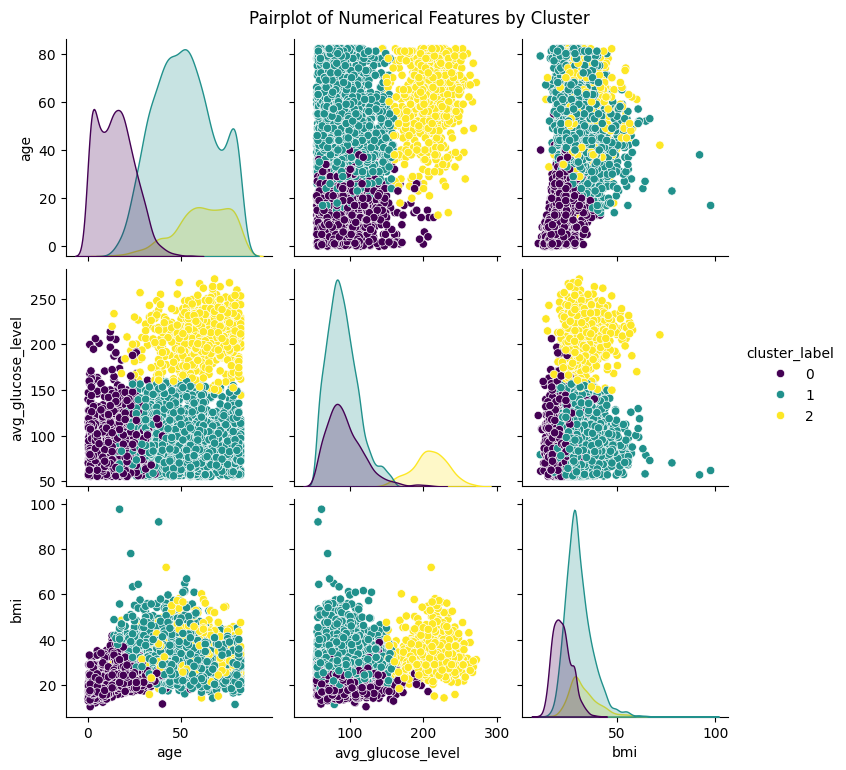


Generating plot for avg_glucose_level by cluster...


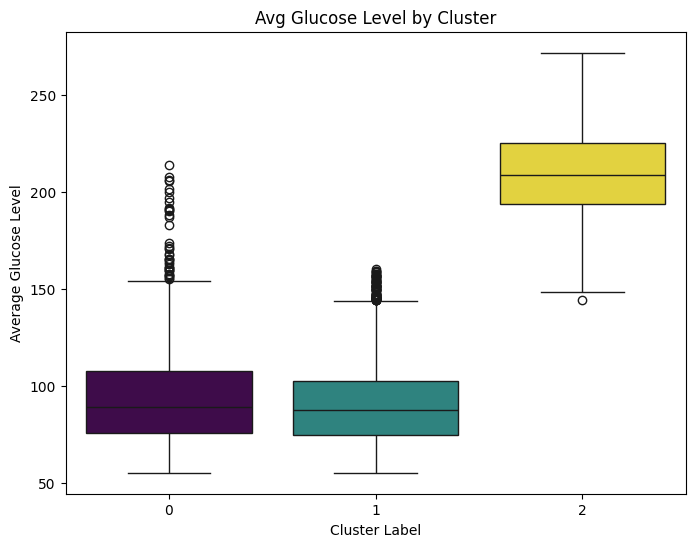


Generating countplot for age_cat by cluster...


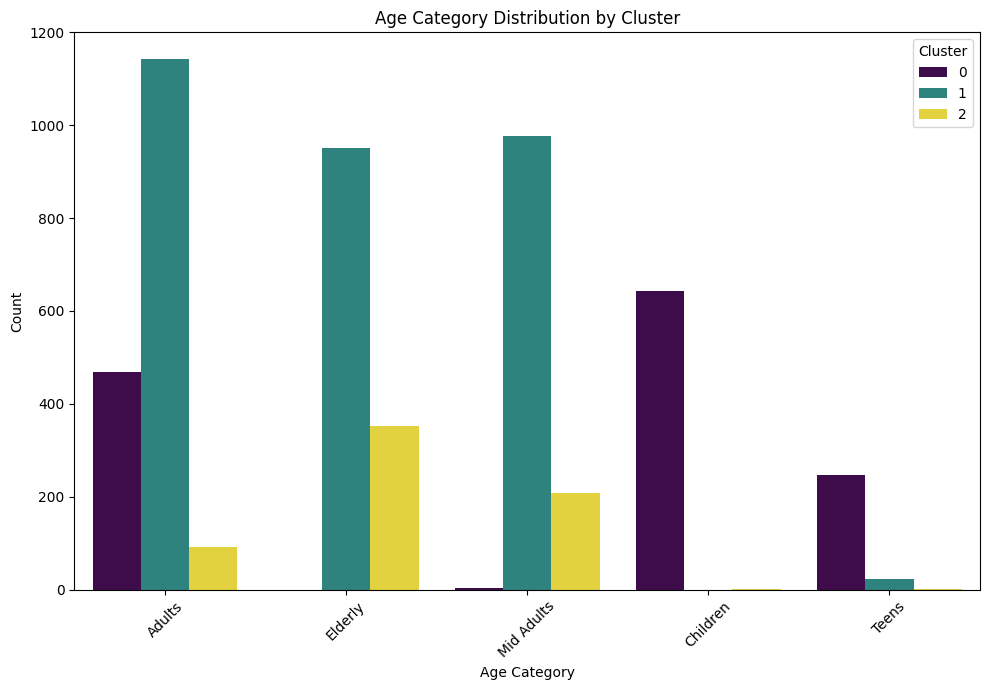


Running Elbow Method to find the number of cluster 


NameError: name 'k_range' is not defined

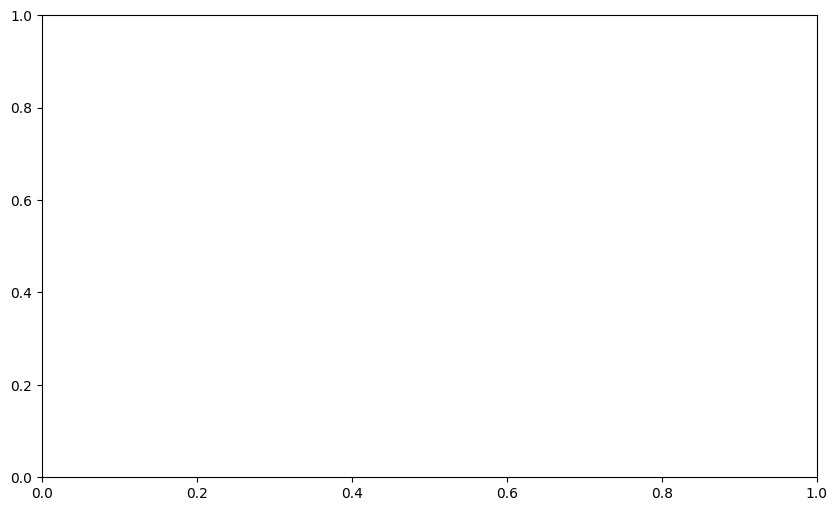

In [28]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans

# --- Data Preprocessing for K-Means ---
# Define numerical features that need scaling
numerical_features = ['age', 'avg_glucose_level', 'bmi']

cat_feat = [
    'gender', 'hypertension', 'heart_disease', 'ever_married',
    'work_type', 'Residence_type', 'smoking_status',
    'bmi_cat', 'age_cat', 'glucose_cat'
]


# K-Means do not handle NaNs.
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_feat)
    ])

# Create a pipeline with preprocessing and K-Means clustering
kmeans_model = Pipeline(steps=[('preprocessor', preprocessor),
                               ('kmeans', KMeans(n_clusters=3, random_state=42, n_init='auto'))])
kmeans_model.fit(df)

# Get the cluster labels from the K-Means step in the pipeline
df['cluster_label'] = kmeans_model.named_steps['kmeans'].labels_


# --- Analyze Clusters ---
# Group by cluster and calculate the mean of numerical features
print("\nMean of Original Numerical Features by Cluster:")
print(df.groupby('cluster_label')[numerical_features].mean())

# Count occurrences of categorical features by cluster
print("\nCategorical Feature Counts by Cluster (unstacked):")
for col in cat_feat:
    print(f"\n--- {col} ---")
    # Using unstack to get counts for each category within each cluster
    print(df.groupby('cluster_label')[col].value_counts().unstack(fill_value=0))

# --- Visualization (example for numerical features) ---
# Pairplot of numerical features colored by cluster
print("\nGenerating pairplot for numerical features by cluster...")
plt.figure(figsize=(12, 10))
sns.pairplot(df, vars=numerical_features, hue='cluster_label', palette='viridis')
plt.suptitle('Pairplot of Numerical Features by Cluster', y=1.02)
plt.show()

# Distribution of 'avg_glucose_level' by cluster
print("\nGenerating plot for avg_glucose_level by cluster...")
plt.figure(figsize=(8, 6))
sns.boxplot(x='cluster_label', y='avg_glucose_level', data=df, palette='viridis', hue='cluster_label', legend=False)
plt.title('Avg Glucose Level by Cluster')
plt.xlabel('Cluster Label')
plt.ylabel('Average Glucose Level')
plt.show()

# Example for a categorical feature: Countplot of 'age_cat' by cluster
print("\nGenerating countplot for age_cat by cluster...")
plt.figure(figsize=(10, 7))
sns.countplot(data=df, x='age_cat', hue='cluster_label', palette='viridis', order=df['age_cat'].value_counts().index)
plt.title('Age Category Distribution by Cluster')
plt.xlabel('Age Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()


# --- Elbow Method to find the number of cluster ---
print("\nRunning Elbow Method to find the number of cluster ")
wcs = []
# for each K, rather than refitting the entire pipeline each time, which is more efficient.

X_preprocessed = preprocessor.fit_transform(df)

# Then, run KMeans directly on the transformed data
k_r = range(1, min(len(df) -1, 6)) # Max 5 clusters or num_samples-1, and must be at least 1 cluster

for i in k_r:
    if i < len(X_preprocessed):
        km_elbow = KMeans(n_clusters=i, random_state=42, n_init='auto')
        km_elbow.fit(X_preprocessed)
        wcs.append(km_elbow.inertia_)
    else:
        # If k is too large for the number of samples, we cannot fit
        wcs.append(np.nan) # Append NaN or break if this condition is hit

# plt.figure(figsize=(10, 6))
# plt.plot(k_range, wcs, marker='o', linestyle='--')
# plt.title('Elbow Method For Optimal K')
# plt.xlabel('Number of Clusters (K)')
# plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
# plt.xticks(k_range)
# plt.grid(True)
# plt.show()

fig, ax = plt.subplots(figsize=(10, 6)) # Create figure and axes objects
ax.plot(k_range, wcs, marker='o', linestyle='--') # Plot on the axes
ax.set(title='Elbow Method For Optimal K', # Set multiple properties at once
       xlabel='Number of Clusters (K)',
       ylabel='Within-Cluster Sum of Squares (WCSS)')
ax.set_xticks(k_range) # Set x-ticks
ax.grid(True) # Enable grid
plt.show() # Display the plot

**K-Means Cluster 0:** This cluster primarily represents a young, healthy demographic (children/teens) with normal glucose, ideal BMI, and very low prevalence of chronic diseases, mostly unmarried.  
**K-Means Cluster 1:** This group consists of mid-aged adults, predominantly married, with normal glucose levels but a tendency towards overweight or obesity, and a moderate prevalence of hypertension and heart disease.  
**K-Means Cluster 2:** This cluster is characterized by elderly individuals with significantly high glucose levels, obesity, and a very high prevalence of hypertension and heart disease, indicating a high-risk group.  

2. **Hierarchical Clustering**

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

X_processed = preprocessor.fit_transform(df)

Z = linkage(X_processed, method='ward', metric='euclidean')

# print("\nGenerating Dendrogram for Hierarchical Clustering...")
# plt.figure(figsize=(15, 7))
# dendrogram(
#     Z,
#     truncate_mode='lastp',  
#     p=10,                   
#     leaf_rotation=45.,
#     leaf_font_size=12.,
#     show_contracted=True,
    
# )
# plt.title('Hierarchical Clustering Dendrogram (Ward Linkage, Euclidean Distance)')
# plt.xlabel('Sample Index or (Cluster Size)')
# plt.ylabel('Distance')
# plt.axhline(y=10, color='r', linestyle='--') # Example horizontal line to cut for 3 clusters
# plt.show()

# --- More concise Dendrogram plotting approach ---
print("\nGenerating Dendrogram for Hierarchical Clustering...")

# Create figure and axes objects
fig, ax = plt.subplots(figsize=(15, 7))

# Plot the dendrogram directly onto the axes
dendrogram(
    Z,
    ax=ax,                   # Specify the axes to plot on
    truncate_mode='lastp',
    p=10,
    leaf_rotation=45.,
    leaf_font_size=12.,
    show_contracted=True,
)

# Set multiple axes properties at once using ax.set()
ax.set(
    title='Hierarchical Clustering Dendrogram (Ward Linkage, Euclidean Distance)',
    xlabel='Sample Index or (Cluster Size)',
    ylabel='Distance'
)

# Add the horizontal line to the axes
ax.axhline(y=10, color='r', linestyle='--', label='Example horizontal cut')
ax.legend() # Show legend for the horizontal line
ax.grid(True) # Add grid if desired

plt.show() # Display the plot

print("\nTo determine the number of clusters from the dendrogram: Look for large vertical distances that are not intersected by any horizontal cut. A horizontal line cutting through the longest vertical lines defines the clusters.")
print("For instance, cutting the dendrogram at a distance of ~10 (the red dashed line) might yield 3 clusters.")

# Apply AgglomerativeClustering to get the cluster labels
n_clusters_hc = 3
hc_model = AgglomerativeClustering(n_clusters=n_clusters_hc, linkage='ward', metric='euclidean')

df['cluster_label_hc'] = hc_model.fit_predict(X_processed)

print(f"\nDataFrame with Hierarchical Cluster Labels (n_clusters={n_clusters_hc}):")
print(df.head())
print(f"\nHierarchical Cluster counts (n_clusters={n_clusters_hc}):")
print(df['cluster_label_hc'].value_counts())

# --- Analyze Hierarchical Clusters ---
# Group cluster and mean calculation of numerical features
print(f"\nMean of Original Numerical Features by Hierarchical Cluster (n_clusters={n_clusters_hc}):")
print(df.groupby('cluster_label_hc')[numerical_features].mean())

# Count occurrences of categorical features by cluster
print(f"\nCategorical Feature Counts by Hierarchical Cluster (unstacked, n_clusters={n_clusters_hc}):")
for col in cat_feat:
    print(f"\n--- {col} ---")
    print(df.groupby('cluster_label_hc')[col].value_counts().unstack(fill_value=0))


# Distribution of 'avg_glucose_level' by hierarchical cluster
print(f"\nGenerating distribution plot for avg_glucose_level by Hierarchical Cluster (n_clusters={n_clusters_hc})...")
plt.figure(figsize=(8, 6))
sns.boxplot(x='cluster_label_hc', y='avg_glucose_level', data=df, palette='viridis', hue='cluster_label_hc', legend=False)
plt.title(f'Average Glucose Level Distribution by Hierarchical Cluster (K={n_clusters_hc})')
plt.xlabel('Cluster Label (Hierarchical)')
plt.ylabel('Average Glucose Level')
plt.show()

# Example for a categorical feature: Countplot of 'age_cat' by hierarchical cluster
print(f"\nGenerating countplot for age_cat by Hierarchical Cluster (n_clusters={n_clusters_hc})...")
plt.figure(figsize=(10, 7))
sns.countplot(data=df, x='age_cat', hue='cluster_label_hc', palette='viridis', order=df['age_cat'].value_counts().index)
plt.title(f'Age Category Distribution by Hierarchical Cluster (K={n_clusters_hc})')
plt.xlabel('Age Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Cluster (HC)')
plt.tight_layout()
plt.show()

**Cluster 0:** This is the largest cluster, predominantly composed of mid-aged to elderly individuals who are mostly married. They generally have normal glucose levels but show a tendency towards being overweight or obese. This group also has a lower prevalence of chronic conditions like hypertension and heart disease compared to Cluster 2.  

**Cluster 1:** This is the smallest and most distinct cluster, characterized by very young individuals (primarily children) who are unmarried. They exhibit ideal BMI and normal glucose levels, with virtually no instances of hypertension or heart disease, indicating a very healthy and low-risk group.  

**Cluster 2:** This cluster primarily comprises elderly and mostly married individuals. They are distinguished by significantly high average glucose levels, a high prevalence of obesity, and a notably high incidence of both hypertension and heart disease, marking them as a high-risk group for cardiovascular and metabolic issues.  

3. **Support Vector Machine (SVM) & Random Forest & k-Nearest Neighbors (k-NN)**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# SMOTE is part of the 'imbalanced-learn' library.
# You may need to install it: pip install imbalanced-learn
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline # Use the imblearn pipeline

def run_model_evaluation_with_smote(df):
    """
    Takes a pre-cleaned DataFrame, applies SMOTE to handle class imbalance,
    and evaluates SVM, Random Forest, and k-NN models.

    Args:
        df (pd.DataFrame): A DataFrame that has already been loaded and cleaned.
    """
    # --- 1. Define Features (X) and Target (y) ---
    X = df.drop('stroke', axis=1)
    y = df['stroke']

    # --- 2. Preprocessing Pipeline ---
    numerical_features = X.select_dtypes(include=['int64', 'float64']).columns
    categorical_features = X.select_dtypes(include=['object']).columns

    numerical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())
    ])

    categorical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ])

    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numerical_transformer, numerical_features),
            ('cat', categorical_transformer, categorical_features)
        ])
    
    print("Preprocessing pipelines created.")

    # --- 3. Split Data ---
    # The data split remains the same. SMOTE will only be applied to the training data.
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.7, random_state=42, stratify=y
    )
    print(f"Data split into training ({len(X_train)} samples) and testing ({len(X_test)} samples) sets.")

    # --- 4. Define and Evaluate Models with SMOTE ---
    # Define the models to be evaluated.
    models = {
        'Support Vector Machine (SVM)': SVC(probability=True, random_state=42),
        'Random Forest': RandomForestClassifier(random_state=42),
        'k-Nearest Neighbors (k-NN)': KNeighborsClassifier()
    }

    results = {}

    print("\nStarting model training and evaluation with SMOTE...")
    for model_name, model in models.items():
        # --- Create the SMOTE-aware Pipeline ---
        # The imblearn pipeline ensures SMOTE is only applied to the training data
        # during the `fit` step, not the test data during `predict`.
        smote_pipeline = ImbPipeline(steps=[
            ('preprocessor', preprocessor),
            ('smote', SMOTE(random_state=42)), # Add SMOTE step
            ('classifier', model)
        ])

        # Train the model using the SMOTE pipeline.
        smote_pipeline.fit(X_train, y_train)

        # Make predictions on the original, untouched test set.
        y_pred = smote_pipeline.predict(X_test)
        y_pred_proba = smote_pipeline.predict_proba(X_test)[:, 1]

        # Calculate KPIs.
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, zero_division=0)
        recall = recall_score(y_test, y_pred, zero_division=0)
        f1 = f1_score(y_test, y_pred, zero_division=0)
        roc_auc = roc_auc_score(y_test, y_pred_proba)

        # Store results.
        results[model_name] = {
            'Accuracy (%)': accuracy * 100,
            'Precision': precision,
            'Recall / Sensitivity': recall,
            'F1 Score': f1,
            'ROC-AUC Score': roc_auc
        }
        print(f"  - Evaluation complete for: {model_name}")

    # --- 5. Display Results ---
    results_df = pd.DataFrame(results).T
    
    print("\n--- Model Performance KPIs (with SMOTE) ---")
    print(results_df)


if __name__ == '__main__':
    # --- Example Usage ---
    # This block shows how you would now use the refactored function.
    
    # 1. Load Data
    try:
        main_df = pd.read_csv('healthcare-dataset-stroke-data.csv')
        print("Dataset loaded successfully.")
        
        # 2. Clean Data
        main_df = main_df.drop('id', axis=1)
        main_df = main_df[main_df['gender'] != 'Other']
        print("Initial data cleaning complete.")

        # 3. Run the model evaluation function with the cleaned DataFrame
        run_model_evaluation_with_smote(main_df)

    except FileNotFoundError:
        print("Error: 'healthcare-dataset-stroke-data.csv' not found.")
        print("Please download the dataset from https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset and place it in the correct directory.")


# Overall Analysis: SMOTE Was Highly Effective

Applying SMOTE has successfully addressed the core problem of class imbalance. The results now show a much more realistic and useful picture of each model's capabilities. The models have shifted from simply ignoring the "stroke" class to actively trying to identify it, which is a major step forward.

## Detailed Model Interpretation

### 1. Support Vector Machine (SVM): The Best Performing Model

- **Recall / Sensitivity (50.6%)**:  
  This is a dramatic and crucial improvement. The SVM now correctly identifies more than half of all actual stroke cases in the test set. This is the most important metric for a medical screening tool, and the SVM is the clear winner here.

- **Precision (13.1%)**:  
  This is low, meaning that when the model predicts a stroke, it's correct about 13% of the time. This is a typical trade-off. To catch more true positives (high Recall), you often get more false positives (low Precision). In a medical context, this is often acceptable as further testing would be done on these flagged patients.

- **Conclusion**:  
  The SVM provides the best balance for this problem. It is now a genuinely useful model that can flag a significant portion of at-risk patients for further review. Its high ROC-AUC score (0.78) confirms it's the best model at distinguishing between the two classes.


### 2. k-Nearest Neighbors (k-NN): A Good Improvement

- **Recall / Sensitivity (38.5%)**:  
  The k-NN model also saw a massive improvement, now catching almost 40% of stroke cases. While not as high as the SVM, it's still a respectable performance.

- **Precision (10.2%)**:  
  Like the SVM, its precision is low due to the trade-off made to achieve higher recall.

- **Conclusion**:  
  k-NN is now a viable model, but it is clearly outperformed by the SVM on almost every important metric.


### 3. Random Forest: Unexpectedly Poor Performance

- **Recall / Sensitivity (6.3%)**:  
  This is a very surprising result. Despite balancing the training data with SMOTE, the Random Forest model still failed to learn how to identify the stroke cases effectively, missing over 93% of them.

- **Accuracy (93%)**:  
  Its accuracy remains high primarily because it is still correctly predicting the vast majority of "no-stroke" cases, not because it's good at finding strokes.

- **Conclusion**:  
  Even with SMOTE, the default Random Forest model is not a suitable choice for this problem. It is not sensitive enough to be used for medical screening.


#### Reference  

Orduz, J. C. (2020, May 5). Getting started with spectral clustering. KDnuggets. https://www.kdnuggets.com/2020/05/getting-started-spectral-clustering.html  

Deshpande, T. (n.d.). Stroke prediction: Effect of data leakage | SMOTE. Kaggle. Retrieved from https://www.kaggle.com/code/tanmay111999/stroke-prediction-effect-of-data-leakage-smote  

Joshua's Words. (n.d.). Predicting a stroke [SHAP, LIME Explainer & ELI5]. Kaggle. Retrieved from https://www.kaggle.com/code/joshuaswords/predicting-a-stroke-shap-lime-explainer-eli5  

Chennoju, B. (n.d.). Data storytelling AUC focus on strokes. Kaggle. Retrieved from https://www.kaggle.com/code/bhuvanchennoju/data-storytelling-auc-focus-on-strokes